In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tools as tl
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import matplotlib.animation as animation
import re

In [68]:
## general adjustments made to output .csv for analysis

def load_data(files, subset, coral_success=70, lag_column_names=[], shift_values=[]):
    
    df = tl.load_runs(files, subset)
    df = tl.split_neighbors(df)
    df = tl.add_percent(df)
    
    df = tl.label_crash_statistics(df, coral_success)
    
    df = tl.add_lag(df, lag_column_names, shift_values)
    df = tl.add_crash_time(df)
    

    return(df)

## to normalize, use tl.normalize(df)

## Overview of model runs

In [69]:
top_directory = "./output/" #os.getcwd()
files, overview_of_runs = tl.view_runs(top_directory)

overview_of_runs

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,file
0,15,15,2,53,1500,33,33,10,40,20,75,500,90,10,0
1,15,15,2,53,1500,33,33,10,40,20,75,100,10,10,1
2,15,15,2,53,145,33,33,10,40,20,75,500,90,10,2
3,15,15,2,53,145,33,33,10,40,20,75,100,10,10,3


## Choose Runs to Explore Via Index

In [74]:
files_of_interest = [2,3]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above
subset = overview_of_runs.loc[files_of_interest,:]
df = load_data(files, subset, coral_success=60)
df.head()

,simulation,timestep,coral_count,turf_count,macroalgae_count,coral_patch_count,algae_patch_count,turf_patch_count,macroalgae_patch_count,file,...,turf_macro_neighbors,macro_coral_neighbors,macro_turf_neighbors,macro_macro_neighbors,coral_percent,turf_percent,macroalgae_percent,coral_success,total_time_to_crash,time_to_crash
0,0,0,74,70,81,1,1,9,4,2,...,0.517024,0.072531,0.443519,0.483951,32.888889,31.111111,36.000000,0,540,-100
1,0,90,42,83,100,3,1,8,4,2,...,0.428112,0.055750,0.370167,0.574083,18.666667,36.888889,44.444444,0,540,-100
2,0,180,45,65,115,3,1,13,5,2,...,0.435897,0.091522,0.245942,0.662536,20.000000,28.888889,51.111111,0,540,-100
3,0,270,58,85,82,2,1,6,5,2,...,0.268235,0.137500,0.292683,0.569817,25.777778,37.777778,36.444444,0,540,-100
4,0,360,72,79,74,4,1,11,7,2,...,0.317194,0.142568,0.319144,0.538288,32.000000,35.111111,32.888889,0,540,-100


## OR Choose Run to Explore Via Model Parameters

In [5]:
subset = overview_of_runs[overview_of_runs['neighborhood_threshold'].isin([145,1500])]
df = load_data(files, subset, coral_success=60)
df.head()

,simulation,timestep,coral_count,turf_count,macroalgae_count,coral_patch_count,algae_patch_count,turf_patch_count,macroalgae_patch_count,file,...,turf_macro_neighbors,macro_coral_neighbors,macro_turf_neighbors,macro_macro_neighbors,coral_percent,turf_percent,macroalgae_percent,coral_success,total_time_to_crash,time_to_crash
0,0,0,69,72,84,1,1,8,4,0,...,0.368903,0.319951,0.316604,0.363445,30.666667,32.000000,37.333333,-1,540,540
1,0,90,50,81,94,15,1,10,8,0,...,0.418478,0.224241,0.361422,0.414336,22.222222,36.000000,41.777778,-1,540,450
2,0,180,6,98,121,6,1,6,3,0,...,0.538291,0.026949,0.437710,0.535341,2.666667,43.555556,53.777778,-1,540,360
3,0,270,0,93,132,1,1,8,2,0,...,0.589371,0.000000,0.414746,0.585254,0.000000,41.333333,58.666667,-1,540,270
4,0,360,0,80,145,1,1,7,3,0,...,0.649463,0.000000,0.358841,0.641159,0.000000,35.555556,64.444444,-1,540,180


## Temporal Plots for various Grazing Levels

### Boxplot

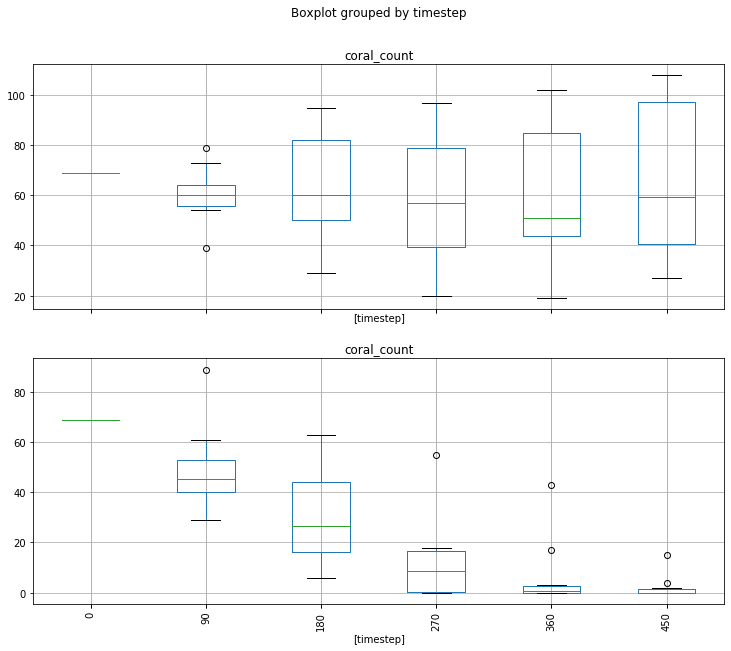

In [6]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharey='row', sharex=True)
df[df['neighborhood_threshold']==145].boxplot(column=['coral_count'], 
                              by=['timestep'], figsize=(5,10), rot=90,ax=ax1)
df[df['neighborhood_threshold']==1500].boxplot(column=['coral_count'], 
                              by=['timestep'], figsize=(5,10), rot=90,ax=ax2)


### Using Seaborn's line plot

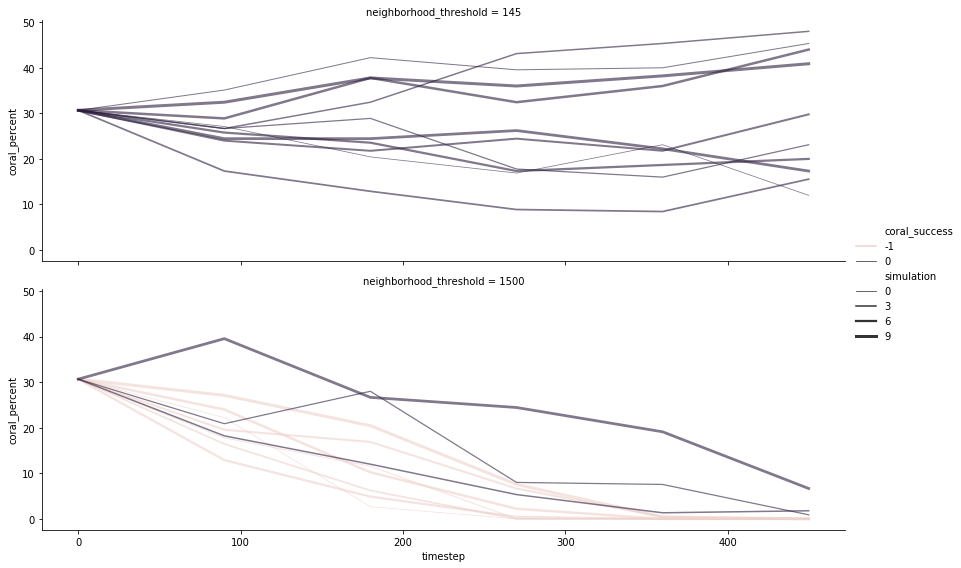

In [7]:
sns.relplot(x="timestep", y="coral_percent", row='neighborhood_threshold', hue='coral_success',
            size='simulation', data=df, kind="line", height=4, aspect=3, alpha=.6)

In [32]:
df.timestep

0        0
1       90
2      180
3      270
4      360
      ... 
115     90
116    180
117    270
118    360
119    450
Name: timestep, Length: 120, dtype: int64

## Spatial Metrics Histograms  - Neighbors

In [26]:
df.columns

Index(['simulation', 'timestep', 'coral_count', 'turf_count',
       'macroalgae_count', 'coral_patch_count', 'algae_patch_count',
       'turf_patch_count', 'macroalgae_patch_count', 'file', 'number_of_rows',
       'number_of_columns', 'grid_option', 'grazing', 'neighborhood_threshold',
       'initial_coral_percent', 'initial_macroalgae_percent', 'r', 'd', 'a',
       'y', 'number_of_timesteps', 'record_rate', 'number_of_simulations',
       'coral_coral_neighbors', 'coral_turf_neighbors',
       'coral_macro_neighbors', 'turf_coral_neighbors', 'turf_turf_neighbors',
       'turf_macro_neighbors', 'macro_coral_neighbors', 'macro_turf_neighbors',
       'macro_macro_neighbors', 'coral_percent', 'turf_percent',
       'macroalgae_percent', 'coral_success', 'total_time_to_crash',
       'time_to_crash'],
      dtype='object')

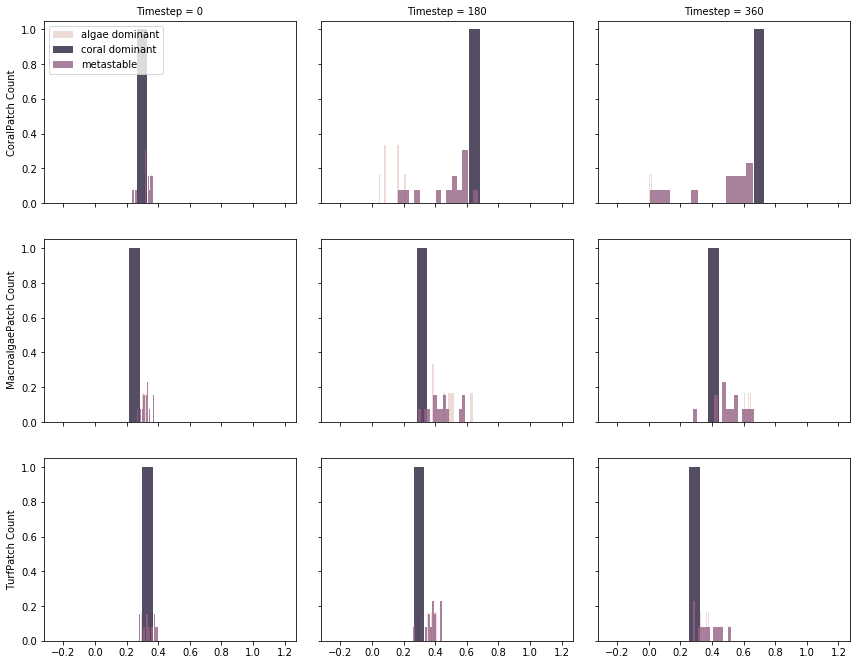

In [33]:
variables = ['coral_coral_neighbors','macro_macro_neighbors','turf_turf_neighbors']
timesteps = [0,180,360]


colors = {-1:'#EAD3CD', 0:'#956285', 1:'#2A203C'}
legend_keys = {-1:'algae dominant', 0:'metastable', 1:'coral dominant'}
ylabels = ['Coral', ' Macroalgae', 'Turf' ]
row = 0
nbins = 15

fig, ax = plt.subplots(len(variables), len(timesteps), figsize=(12,10), sharey='row', sharex=True)
for variable in variables:
    for column in range(0,len(timesteps)):
        for success in [-1,1,0]:
            array = df[(df['timestep']==timesteps[column]) & (df['coral_success'] == success)][variable]
            hist, bins = np.histogram(array, bins=15)
            ax[row,column].bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color=colors[success], alpha=.8, label=legend_keys[success])        
        ax[0,column].set_title('Timestep = ' + str(timesteps[column]),fontsize=10)        
    ax[row,0].set_ylabel(ylabels[row] + 'Patch Count')
    row = row + 1
fig.tight_layout()

#histogramMatrix()
    
ax[0,0].legend(loc='upper left')
fig.subplots_adjust(top=.9, wspace=.1, hspace=.2)
neighbors_plot = plt
plt.show()

#fig.suptitle('Normalized average same-species neighbors for simulations with ' + '\n' +'varying final coral successes :: Grazing=.5, Initial Coral=50%', fontsize=17) # or plt.suptitle('Main title')
#plt.savefig('figures_paper/hist_neighbors_small.png', dpi=200)



## View Images 

In [75]:
image_files, overview_of_images = tl.view_images(top_directory, overview_of_runs)
overview_of_images[['image_file','file','number_of_simulations', 'timestep','number_of_rows','number_of_columns','grazing']].head()

,image_file,file,number_of_simulations,timestep,number_of_rows,number_of_columns,grazing
0,0,1,10,80,15,15,53
1,2,1,10,40,15,15,53
2,3,1,10,80,15,15,53
3,4,1,10,30,15,15,53
4,6,1,10,0,15,15,53


In [76]:
overview_of_images['timestep'].unique()

array([ 80,  40,  30,   0,  60,  10,  70,  20,  50,  90, 270, 450, 180,
       360])

In [66]:
overview_of_images

,number_of_rows,number_of_columns,grid_option,grazing,neighborhood_threshold,simulation,timestep,initial_coral_percent,initial_macroalgae_percent,r,d,a,y,number_of_timesteps,record_rate,number_of_simulations,image_file,file
0,15,15,2,53,1500,9,270,33,33,10,40,20,75,500,90,10,1,0
1,15,15,2,53,1500,5,0,33,33,10,40,20,75,500,90,10,5,0
2,15,15,2,53,1500,2,450,33,33,10,40,20,75,500,90,10,8,0
3,15,15,2,53,1500,6,180,33,33,10,40,20,75,500,90,10,11,0
4,15,15,2,53,1500,5,270,33,33,10,40,20,75,500,90,10,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,15,15,2,53,145,7,450,33,33,10,40,20,75,500,90,10,310,1
116,15,15,2,53,145,3,180,33,33,10,40,20,75,500,90,10,312,1
117,15,15,2,53,145,0,270,33,33,10,40,20,75,500,90,10,313,1
118,15,15,2,53,145,7,360,33,33,10,40,20,75,500,90,10,315,1


In [96]:
images_dictionary = tl.load_images(image_files, overview_of_images, file=1, simulation=1, nrows=15)
images_dictionary

{20: array([[1., 0., 2., 1., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 1.],
        [2., 1., 0., 1., 0., 2., 2., 0., 2., 2., 2., 1., 1., 1., 1.],
        [1., 0., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 2.],
        [2., 1., 2., 2., 1., 1., 1., 2., 0., 0., 2., 2., 2., 1., 2.],
        [2., 0., 0., 2., 0., 1., 0., 1., 1., 1., 0., 0., 1., 2., 1.],
        [2., 1., 0., 1., 1., 1., 1., 1., 0., 0., 2., 0., 1., 2., 1.],
        [2., 1., 2., 0., 1., 0., 1., 1., 0., 0., 1., 2., 2., 1., 2.],
        [2., 0., 0., 0., 1., 1., 2., 0., 1., 0., 0., 1., 0., 0., 1.],
        [0., 0., 2., 0., 1., 2., 0., 2., 1., 0., 0., 0., 2., 2., 1.],
        [1., 2., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 2.],
        [1., 1., 2., 0., 0., 1., 0., 0., 1., 0., 2., 1., 2., 2., 0.],
        [2., 1., 2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 0., 1., 2.],
        [2., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 0., 2.],
        [0., 1., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 0., 2., 2.],
        [2., 0.,

In [93]:
np.count_nonzero(images_dictionary[0]==0)/225, np.count_nonzero(images_dictionary[0]==1)/225, np.count_nonzero(images_dictionary[0]==2)/225

(0.3288888888888889, 0.3333333333333333, 0.3377777777777778)

### Comparing Neighborhood Threshold in early model evolution

In [105]:
overview_of_images[(overview_of_images['file'].isin([1,3]))&(overview_of_images['timestep']==0)&(overview_of_images['simulation']==6)][['file','neighborhood_threshold']]

,file,neighborhood_threshold
10,1,1500
170,3,145


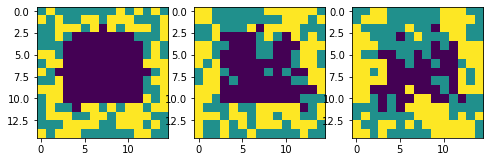

In [99]:
file=3
simulation=1
timesteps = [0,20,50]
images_dictionary = tl.load_images(image_files, overview_of_images, file=file, simulation=simulation, nrows=15)

fig, ax = plt.subplots(1,len(timesteps), figsize=(8,4)) 
legend_keys = ['C', 'T', 'M']
for index in range(0,len(timesteps)):
    ax[index].imshow(images_dictionary[timesteps[index]])

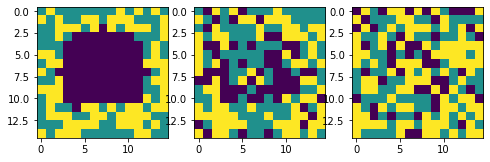

In [97]:
file=1
simulation=1
timesteps = [0,20,50]
images_dictionary = tl.load_images(image_files, overview_of_images, file=file, simulation=simulation, nrows=15)

fig, ax = plt.subplots(1,len(timesteps), figsize=(8,4)) 
legend_keys = ['C', 'T', 'M']
for index in range(0,len(timesteps)):
    ax[index].imshow(images_dictionary[timesteps[index]])

In [89]:
df.columns

Index(['simulation', 'timestep', 'coral_count', 'turf_count',
       'macroalgae_count', 'coral_patch_count', 'algae_patch_count',
       'turf_patch_count', 'macroalgae_patch_count', 'file', 'number_of_rows',
       'number_of_columns', 'grid_option', 'grazing', 'neighborhood_threshold',
       'initial_coral_percent', 'initial_macroalgae_percent', 'r', 'd', 'a',
       'y', 'number_of_timesteps', 'record_rate', 'number_of_simulations',
       'coral_coral_neighbors', 'coral_turf_neighbors',
       'coral_macro_neighbors', 'turf_coral_neighbors', 'turf_turf_neighbors',
       'turf_macro_neighbors', 'macro_coral_neighbors', 'macro_turf_neighbors',
       'macro_macro_neighbors', 'coral_percent', 'turf_percent',
       'macroalgae_percent', 'coral_success', 'total_time_to_crash',
       'time_to_crash'],
      dtype='object')